[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keras-team/autokeras/blob/master/docs/templates/tutorial/image_classification.ipynb)

In [1]:
import tensorflow as tf
import autokeras as ak
tf.__version__, ak.__version__

('2.3.1', '1.0.11')

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

## Load Cifar10 dataset

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape) # (60000, 28, 28)
print('Training label shape:', y_train.shape) # (60000,)
print('First five training labels:', y_train[:5]) # array([5 0 4 1 9], dtype=uint8)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
First five training labels: [[6]
 [9]
 [9]
 [4]
 [1]]


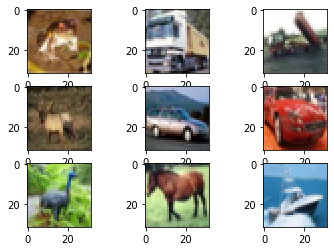

In [4]:
# plot first few images
from matplotlib import pyplot as plt
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [5]:
dog_cat_indices_train = (y_train[:, 0]==3) | (y_train[:, 0]==5)
dog_cat_indices_test = (y_test[:, 0]==3) | (y_test[:, 0]==5)
x_train, y_train = x_train[dog_cat_indices_train], y_train[dog_cat_indices_train]
x_test, y_test = x_test[dog_cat_indices_test], y_test[dog_cat_indices_test]
print('Training image shape:', x_train.shape) # (60000, 28, 28)
print('Training label shape:', y_train.shape) # (60000,)
print('First five training labels:', y_train[:5]) # array([5 0 4 1 9], dtype=uint8)

Training image shape: (10000, 32, 32, 3)
Training label shape: (10000, 1)
First five training labels: [[3]
 [3]
 [3]
 [3]
 [5]]


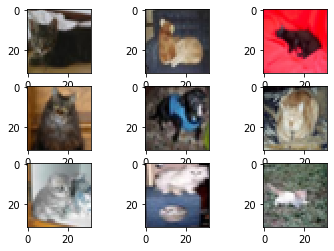

In [6]:
# plot first few images
from matplotlib import pyplot as plt
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

## HyperBlock for image preprocessing method selection (ImageBlock)

In [ ]:
import autokeras as ak
import timeit

input_node = ak.ImageInput()
output_node = ak.ImageBlock(
                # Only search vanilla CNN architectures.
                block_type="resnet")(input_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=10,
    overwrite=True,
    seed=42)

start_time = timeit.default_timer()
auto_model.fit(x_train, y_train, epochs=10, batch_size=64)
stop_time = timeit.default_timer()
print('Total time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))

Trial 5 Complete [00h 02m 45s]
val_loss: 0.6626415848731995

Best val_loss So Far: 0.6548323035240173
Total elapsed time: 00h 13m 35s

Search: Running Trial #6

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|False             |False             
image_block_1/a...|True              |False             
image_block_1/r...|False             |False             
image_block_1/r...|resnet152_v2      |resnet152_v2      
image_block_1/r...|False             |False             
classification_...|flatten           |flatten           
classification_...|0                 |0                 
optimizer         |adam              |adam              
learning_rate     |0.001             |0.001             
image_block_1/i...|0.1               |None              
image_block_1/i...|True              |None              
image_block_1/i...|False             |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0                 |Non

In [7]:
auto_model.tuner.results_summary()

Results summary
Results in ./auto_model
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
image_block_1/normalize: True
image_block_1/augment: False
image_block_1/conv_block_1/kernel_size: 3
image_block_1/conv_block_1/num_blocks: 2
image_block_1/conv_block_1/num_layers: 2
image_block_1/conv_block_1/separable: False
image_block_1/conv_block_1/max_pooling: True
image_block_1/conv_block_1/dropout: 0
image_block_1/conv_block_1/filters_0_0: 32
image_block_1/conv_block_1/filters_0_1: 32
image_block_1/conv_block_1/filters_1_0: 64
image_block_1/conv_block_1/filters_1_1: 32
classification_head_1/spatial_reduction_1/reduction_type: flatten
classification_head_1/dropout: 0.5
optimizer: adam
learning_rate: 0.001
Score: 0.9505698084831238
Trial summary
Hyperparameters:
image_block_1/normalize: True
image_block_1/augment: False
image_block_1/conv_block_1/kernel_size: 5
image_block_1/conv_block_1/num_blocks: 2
image_block_1/conv_block_1/num_layers: 2
im

In [ ]:
best_model = auto_model.export_model()
best_model.summary()

In [ ]:

test_loss, test_acc = auto_model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {accuracy}%'.format(accuracy=round(test_acc * 100, 2)))



## Use normalization, search augmentation

In [ ]:
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
                # Only search ResNet architectures.
                block_type="resnet",
                # Normalize the dataset.
                normalize=True)(input_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=3,
    overwrite=True,
    seed=42)

start_time = timeit.default_timer()
auto_model.fit(x_train, y_train, epochs=3, batch_size=64)
stop_time = timeit.default_timer()
print('Total time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))

## Equivalent

In [ ]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageAugmentation(horizontal_flip=False)(output_node)
output_node = ak.ResNetBlock(version="v2")(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=1)
clf.fit(x_train, y_train, epochs=10)

## Reference
[ImageClassifier](/image_classifier),
[AutoModel](/auto_model/#automodel-class),
[ImageBlock](/block/#imageblock-class),
[Normalization](/preprocessor/#normalization-class),
[ImageAugmentation](/preprocessor/#image-augmentation-class),
[ResNetBlock](/block/#resnetblock-class),
[ImageInput](/node/#imageinput-class),
[ClassificationHead](/head/#classificationhead-class).